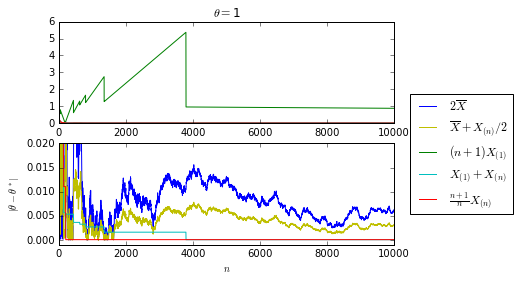

(3) , diff[N-1] = 0.872361804406
(1) , diff[N-1] = 0.00607380490224
(2) , diff[N-1] = 0.00307033866764
(5) , diff[N-1] = 6.6872433049e-05
(4) , diff[N-1] = 5.4109889744e-05


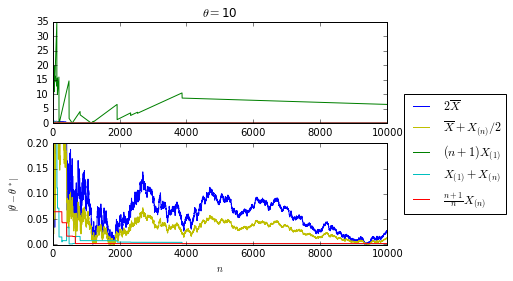

(3) , diff[N-1] = 6.42438415645
(1) , diff[N-1] = 0.0261594706843
(2) , diff[N-1] = 0.0123608237598
(5) , diff[N-1] = 0.00143782316465
(4) , diff[N-1] = 0.00108029733288


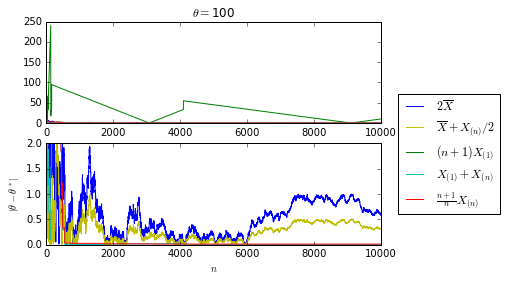

(3) , diff[N-1] = 10.0994897464
(1) , diff[N-1] = 0.616740989784
(2) , diff[N-1] = 0.315080290553
(5) , diff[N-1] = 0.0134195913233
(4) , diff[N-1] = 0.00241074323344


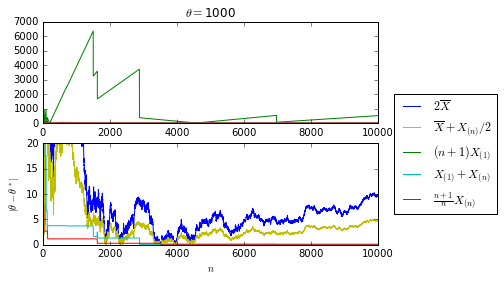

(3) , diff[N-1] = 513.016899516
(1) , diff[N-1] = 9.76883799027
(2) , diff[N-1] = 4.82635961399
(5) , diff[N-1] = 0.116118762283
(4) , diff[N-1] = 0.0351677990126


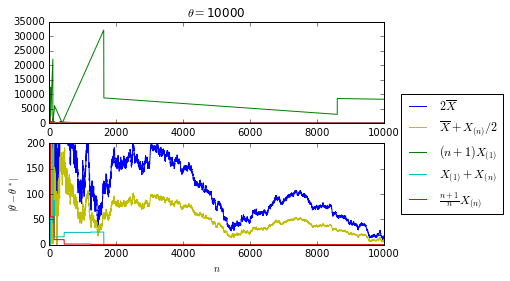

(3) , diff[N-1] = 8212.81924346
(1) , diff[N-1] = 16.8375255876
(2) , diff[N-1] = 8.58259083868
(5) , diff[N-1] = 0.327656089732
(4) , diff[N-1] = 0.148955884099


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
N = 10**4

OX = [i for i in range(1,N+1)]
colors = ['b','y','g','c','r']
description = [r'$2\overline{X}$',
             r'$\overline{X}+X_{(n)}/2$',
             r'$(n+1)X_{(1)}$',
             r'$X_{(1)}+X_{(n)}$',
             r'$\frac{n+1}{n}X_{(n)}$']

def calc_result(theta): 
    #generating uniform distribution points
    X = stats.uniform.rvs(scale = theta,size = N)
    
    #calculating evaluations
    evl = [np.zeros(N) for i in range(5)]
    s = 0
    mmin = X[0]
    mmax = X[0]
    for n in range(1,N + 1):
        s += X[n-1]
        mmin = min(mmin,X[n-1])
        mmax = max(mmax,X[n-1])
        evl[0][n-1] =  2 * s / n
        evl[1][n-1] =  s/n + mmax / 2
        evl[2][n-1] = (n+1) * mmin
        evl[3][n-1] =  mmin + mmax
        evl[4][n-1] = (n+1)/ n * mmax
    
    #calulating differences   
    for i in range(N) : 
        for j in range(5) :
            evl[j][i] -= theta
            evl[j][i] = abs(evl[j][i])

    #build plots
    plt.subplot(211) #all evaluations
    plt.title(r'$\theta = $' + str(theta))
    for i in range(5): 
        plt.plot(OX,evl[i],colors[i],label = description[i])
    
    plt.legend(loc=(1.05,-0.9))
        
    plt.subplot(212) #good evaluations(состоятельные)
    plt.xlabel(r'$n$')
    plt.ylabel(r'$|\theta - \theta^*|$')
    plt.axis([0, N, -0.001, theta/50.0])  
    for i in range(5): 
        if i == 2 : 
            continue #except the third evl
        plt.plot(OX,evl[i],colors[i])
        
    plt.show()
    
    # compare evaluatons
    diff_n = [[evl[i][N-1],i+1] for i in range(5)]
    diff_n.sort()
    diff_n.reverse()
    for x in diff_n :
        print("(" +  str(x[1]) + ") , diff[N-1] = " + str(x[0]) )
    
#start
for i in range(5):
    calc_result(10**i)
    
#вывды:
#1)свойство несмещенности у оценки не гарантирует более быстрой сходимости (и даже просто сходимости)
#2)т.к. оценка 3 несостоятельна модуль разности не стремится к нулю
#3)порядок модулей разности чаще всего такой: 5,4,2,1,3
#4)оценки 4 и 5 лучше всего приближают параметр.